In [1]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_data = pd.read_csv('/Users/flatironschool/Documents/flatiron/Mod3_Classification/Data/Water/water_data_set.csv')
y_data = pd.read_csv('/Users/flatironschool/Documents/flatiron/Mod3_Classification/Data/Water/water_y.csv')
X_test = pd.read_csv('/Users/flatironschool/Documents/flatiron/Mod3_Classification/Data/Water/water_test.csv')
X_data.tail(4)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
59399,26348,0.0,2011-03-23,World Bank,191,World,38.104048,-6.747464,Kwa Mzee Lugawa,0,...,on failure,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
X_data= pd.merge(X_data, y_data, left_on='id', right_on='id', how='left')

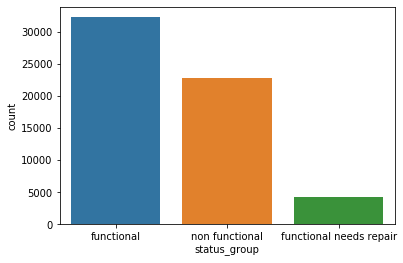

In [5]:
sns.countplot(x="status_group", data= X_data);

# EDA

## Geographical / Demografical

In [6]:
df_geo = X_data[['longitude','latitude','basin','subvillage','region','region_code',
        'district_code','lga','ward','gps_height','population']].copy()


In [7]:
X_data.funder.nunique()

1897

In [8]:
X_data.loc[X_data.subvillage.isna()].region.value_counts()
# Im not sure what to do with this nan values... they are not that many\
#they are only located in to regions I will find the most comon value for the 
#subillage in each region and impute that

Dodoma    361
Mwanza     10
Name: region, dtype: int64

In [9]:
X_data[(df_geo.region =='Dodoma')].subvillage.value_counts()
#for Dodoma is kawawa

Kawawa        54
Shuleni       43
Nyerere       35
Azimio        34
Majengo       32
              ..
Mazae Kati     1
Kazemgulu      1
Kihesa         1
Nguluwiri      1
Miyengweni     1
Name: subvillage, Length: 705, dtype: int64

In [10]:
X_data[(df_geo.region =='Mwanza')].subvillage.value_counts()
# for Mwanza is 1

1                132
Madukani          52
Bujingwa          25
Shuleni           19
Mwabasabi         18
                ... 
Sukuma Center      1
Mwanyeye B         1
Umoja              1
Iseni Bondeni      1
Ibaru              1
Name: subvillage, Length: 1507, dtype: int64

In [11]:
X_data.loc[((X_data.subvillage.isna())&(X_data.region=='Dodoma')),'subvillage']='Kawawa'
X_data.loc[((X_data.subvillage.isna())&(X_data.region=='Mwanza')),'subvillage']='1'

In [12]:
X_test.loc[((X_test.subvillage.isna())&(X_test.region=='Dodoma')),'subvillage']='Kawawa'
X_test.loc[((X_test.subvillage.isna())&(X_test.region=='Mwanza')),'subvillage']='1'

In [13]:
X_data.subvillage.nunique()
#too many categories could be a problem...

19287

In [14]:
X_data.ward.nunique()
##too many categories could be a problem...

2092

### first attempt at imput missing values for 
for longitude and latitude

In [178]:
df_geo.describe()
# non of them have Nan values but longitude and distric_code have zeros
#tanzania sits just below the ecuator so its northest most point has to be below 
#is around -1 and his souther most lest than -12 (there are some wierd values)
# also there shouldn't be any 0 longitude since it it is between ~30E and ~40E

,longitude,latitude,region_code,district_code,gps_height,population
count,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,34.077427,-5.706033e+00,15.297003,5.629747,668.297239,179.909983
std,6.567432,2.946019e+00,17.587406,9.633649,693.116350,471.482176
min,0.000000,-1.164944e+01,1.000000,0.000000,-90.000000,0.000000
25%,33.090347,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,34.908743,-5.021597e+00,12.000000,3.000000,369.000000,25.000000
75%,37.178387,-3.326156e+00,17.000000,5.000000,1319.250000,215.000000
max,40.345193,-2.000000e-08,99.000000,80.000000,2770.000000,30500.000000


In [179]:
df_geo[(df_geo.longitude ==0)].region.value_counts()
#there is seems to be a wrong imputation of longitude and latitude for the lake victoria 
# and lake tanganica basin (shinyanga an Mwanza region) (17,19,11)

Shinyanga    1005
Mwanza        807
Name: region, dtype: int64

In [ ]:
df_geo[(df_geo.latitude >=-2.000000e-08)].region.value_counts()

All of the subvillages are located (shinyanga an Mwanza region)this should help to impute razonable values


In [ ]:
mean_lon_shi = df_geo.loc[(df_geo.longitude !=0)&(df_geo.region=='Shinyanga')].longitude.mean()
mean_lat_shi = df_geo.loc[(df_geo.longitude !=0)&(df_geo.region=='Shinyanga')].latitude.mean()
mean_lon_mwa = df_geo.loc[(df_geo.longitude !=0)&(df_geo.region=='Mwanza')].longitude.mean()
mean_lat_mwa = df_geo.loc[(df_geo.longitude !=0)&(df_geo.region=='Mwanza')].latitude.mean()
[mean_lon_shi,mean_lat_shi,mean_lon_mwa,mean_lat_mwa]

In [ ]:
df_geo.loc[((df_geo.longitude ==0)&(df_geo.region=='Shinyanga')),'longitude']=mean_lon_shi
df_geo.loc[(df_geo.longitude ==0)&(df_geo.region=='Shinyanga'),'latitude']=mean_lat_shi
df_geo.loc[(df_geo.longitude ==0)&(df_geo.region=='Mwanza'),'longitude']=mean_lon_mwa
df_geo.loc[(df_geo.longitude ==0)&(df_geo.region=='Mwanza'),'latitude']=mean_lat_mwa

In [ ]:
df_geo.describe()
# there are some Lake victory basin

In [ ]:
df_geo.gps_height.value_counts()
#lots of zeros 

In [ ]:
df_geo.population.value_counts()

### Impute values using KNN and Sklearn\

First step is to make all the values we want to replace NaN, this include outside the rang values of lat and lon, 0 populaltion, gps_heigh

In [15]:
df_geo_imp = df_geo[['longitude','latitude','region_code','district_code',
                     'gps_height','population']].copy()
df_geo_imp

,longitude,latitude,region_code,district_code,gps_height,population
0,34.938093,-9.856322,11,5,1390,109
1,34.698766,-2.147466,20,2,1399,280
2,37.460664,-3.821329,21,4,686,250
3,38.486161,-11.155298,90,63,263,58
4,31.130847,-1.825359,18,1,0,0
...,...,...,...,...,...,...
59395,37.169807,-3.253847,3,5,1210,125
59396,35.249991,-9.070629,11,4,1212,56
59397,34.017087,-8.750434,12,7,0,0
59398,35.861315,-6.378573,1,4,0,0


In [16]:
df_geo_imp_test = X_test[['longitude','latitude','region_code','district_code',
                     'gps_height','population']].copy()

In [17]:
df_geo_imp.loc[(df_geo_imp.longitude ==0), 'longitude']=np.nan
df_geo_imp_test.loc[(df_geo_imp_test.longitude ==0), 'longitude']=np.nan


In [18]:
df_geo_imp.replace(0, np.NaN, inplace = True)
df_geo_imp_test.replace(0, np.NaN, inplace = True)

In [19]:
df_geo_imp.population.isna().value_counts()

False    38019
True     21381
Name: population, dtype: int64

In [20]:
df_geo_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   longitude      57588 non-null  float64
 1   latitude       59400 non-null  float64
 2   region_code    59400 non-null  int64  
 3   district_code  59377 non-null  float64
 4   gps_height     38962 non-null  float64
 5   population     38019 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 3.2 MB


In [21]:
from sklearn.impute import KNNImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [22]:
imputer = IterativeImputer(verbose=2)
filled = imputer.fit_transform(df_geo_imp)
filled_test = imputer.fit_transform(df_geo_imp_test)

[IterativeImputer] Completing matrix with shape (59400, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 7.64
[IterativeImputer] Change: 1022.6842341639247, scaled tolerance: 30.5 
[IterativeImputer] Ending imputation round 2/10, elapsed time 7.74
[IterativeImputer] Change: 102.12422070557295, scaled tolerance: 30.5 
[IterativeImputer] Ending imputation round 3/10, elapsed time 7.84
[IterativeImputer] Change: 13.930038123266492, scaled tolerance: 30.5 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (14850, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.04
[IterativeImputer] Change: 1031.9584795205192, scaled tolerance: 11.469 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.07
[IterativeImputer] Change: 76.49687787349285, scaled tolerance: 11.469 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.10
[IterativeImputer] Change: 13.734321025667413, scaled tolerance: 11.4

In [23]:
names=['longitude_im','latitude_im','region_code_im','district_code_im',
                     'gps_height_im','population_im']
df_imputed = pd.DataFrame(filled, columns=names )
df_imputed_test= pd.DataFrame(filled_test, columns=names )

In [24]:
df_imputed.describe()

,longitude_im,latitude_im,region_code_im,district_code_im,gps_height_im,population_im
count,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,35.097839,-5.706033e+00,15.297003,5.630311,1145.074237,304.563512
std,2.584034,2.946019e+00,17.587406,9.633362,541.552197,456.712639
min,29.607122,-1.164944e+01,1.000000,1.000000,-94.456480,1.000000
25%,33.354079,-8.540621e+00,5.000000,2.000000,859.758496,98.000000
50%,34.908743,-5.021597e+00,12.000000,3.000000,1298.303684,253.721883
75%,37.178387,-3.326156e+00,17.000000,5.000000,1513.192754,400.344223
max,40.345193,-2.000000e-08,99.000000,80.000000,2770.000000,30500.000000


In [25]:
X_train = pd.concat([X_data, df_imputed], axis=1, sort=False)
X_test = pd.concat([X_test, df_imputed_test], axis=1, sort=False)

In [26]:
X_train.drop(['longitude','latitude','region_code','district_code',
                     'gps_height','population'], axis=1, inplace=True)
X_test.drop(['longitude','latitude','region_code','district_code',
                     'gps_height','population'], axis=1, inplace=True)

In [27]:
X_test.head(1)

,id,amount_tsh,date_recorded,funder,installer,wpt_name,num_private,basin,subvillage,region,...,source_type,source_class,waterpoint_type,waterpoint_type_group,longitude_im,latitude_im,region_code_im,district_code_im,gps_height_im,population_im
0,50785,0.0,2013-02-04,Dmdd,DMDD,Dinamu Secondary School,0,Internal,Magoma,Manyara,...,rainwater harvesting,surface,other,other,35.290799,-4.059696,21.0,3.0,1996.0,321.0


## Pump

In [28]:
from datetime import date, datetime
date_format = '%Y-%m-%d'
b = datetime.strptime('2020-5-27', date_format)
X_train['daysago'] = X_train['date_recorded'].apply(lambda x: (b-datetime.strptime(x, date_format)).days)
X_test['daysago'] = X_test['date_recorded'].apply(lambda x: (b-datetime.strptime(x, date_format)).days)



In [29]:
X_train.daysago.astype(int)

0        3362
1        2639
2        2648
3        2676
4        3241
         ... 
59395    2581
59396    3308
59397    3334
59398    3368
59399    3353
Name: daysago, Length: 59400, dtype: int64

In [30]:
X_train.daysago.value_counts()

3361    572
3359    558
2670    546
3362    520
3360    513
       ... 
3180      1
5839      1
2703      1
3171      1
6435      1
Name: daysago, Length: 356, dtype: int64

In [31]:
X_train.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [32]:
X_train['public_meeting'].replace(np.nan, True , inplace = True)
X_test['public_meeting'].replace(np.nan, True , inplace = True)

In [33]:
X_train.public_meeting.value_counts()

True     54345
False     5055
Name: public_meeting, dtype: int64

In [34]:
X_train.num_private.value_counts()
#don't know what it means and it is mostly zeros will drop

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [35]:
X_train.funder.value_counts()
#1897 distinct funderes

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Roman Cathoric Church        1
Padri                        1
Pentecostal                  1
Mkulima                      1
Maerere                      1
Name: funder, Length: 1897, dtype: int64

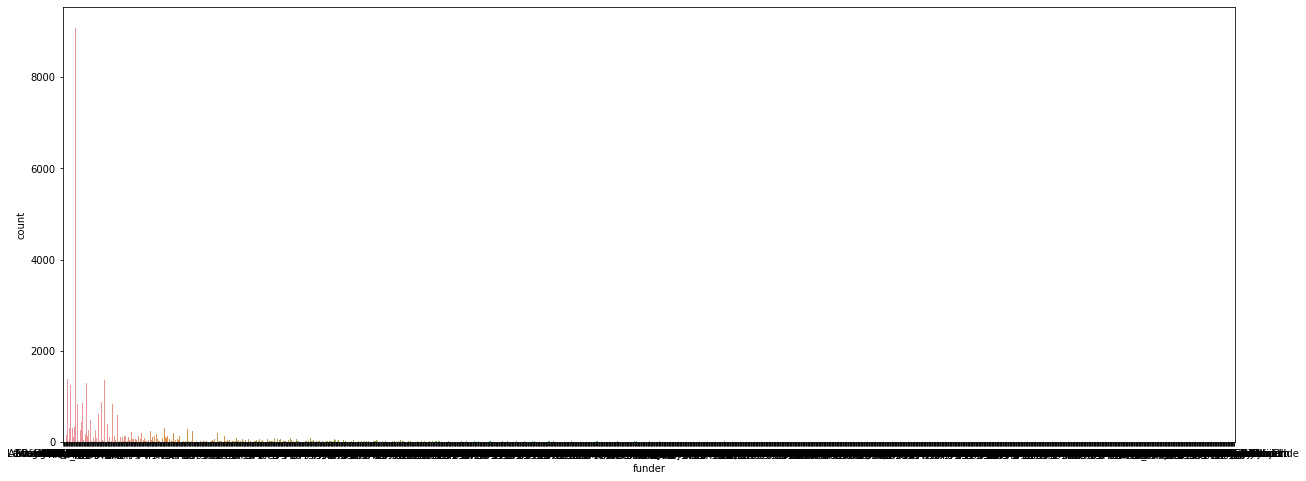

In [36]:
plt.figure(figsize=(21,8))
sns.countplot(x="funder", data=X_train);

In [37]:
X_train.loc[X_train['funder'].map(X_train['funder'].value_counts()) < 500, 'funder']='other'
X_test.loc[X_test['funder'].map(X_test['funder'].value_counts()) < 128, 'funder']='other'

X_test.funder.value_counts()

other                     6726
Government Of Tanzania    2215
Danida                     793
Hesawa                     580
World Bank                 352
Kkkt                       336
Rwssp                      329
World Vision               316
Unicef                     267
Tasaf                      259
Dhv                        236
Private Individual         208
0                          203
Dwsp                       201
District Council           194
Norad                      184
Water                      156
Germany Republi            155
Ministry Of Water          138
Tcrs                       133
Name: funder, dtype: int64

In [38]:
X_train['funder'].replace(np.nan, 'other', inplace = True)
X_test['funder'].replace(np.nan, 'other', inplace = True)

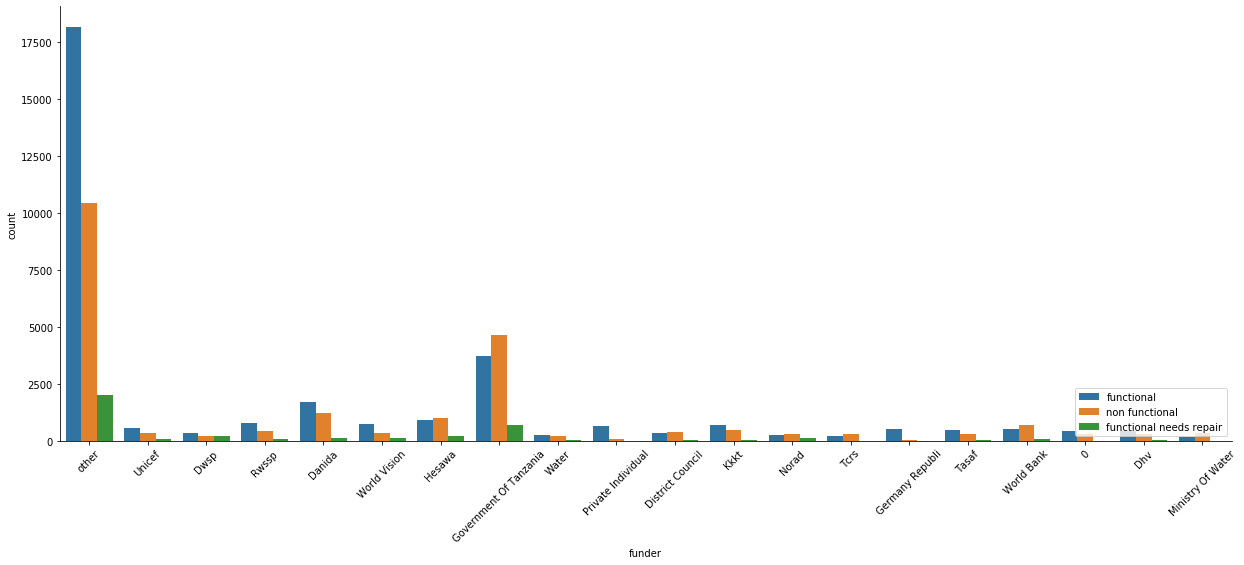

In [39]:
plt.figure(figsize=(21,8))
chart = sns.countplot(x="funder", hue='status_group', data=X_train)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);
plt.legend(loc='lower right')
sns.despine()

In [40]:
X_train.loc[X_train['installer'].map(X_train['installer'].value_counts()) < 500, 'installer']='other'
X_test.loc[X_test['installer'].map(X_test['installer'].value_counts()) < 110, 'installer']='other'

In [41]:
X_train['installer'].replace(np.nan, 'other', inplace = True)
X_test['installer'].replace(np.nan, 'other', inplace = True)
#I will lump the nan values with other 

In [42]:
X_train.installer.nunique()

16

In [43]:
X_test.installer.value_counts()

other                 7554
DWE                   4349
Government             457
RWE                    292
Commu                  287
DANIDA                 255
Hesawa                 230
KKKT                   222
0                      203
TCRS                   180
CES                    155
Central government     142
HESAWA                 140
DANID                  138
Community              134
District Council       112
Name: installer, dtype: int64

In [44]:
X_train.installer.isna().sum()

0

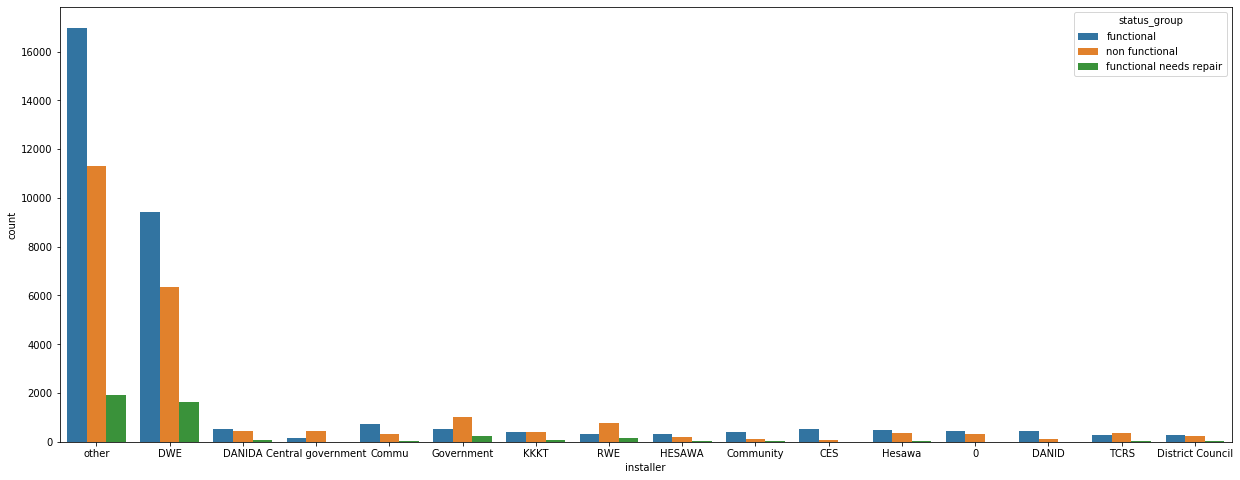

In [45]:
plt.figure(figsize=(21,8))
sns.countplot(x="installer",hue='status_group', data=X_train);

In [46]:
X_train.wpt_name.nunique()
# will drop (I don't think that the name has any predctive value)

37400

In [47]:
X_train.recorded_by.value_counts()
#will drop

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [48]:
X_train.scheme_management.value_counts()
# will add nan to other

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [49]:
X_train['scheme_management'].replace(np.nan, 'other', inplace = True)
X_train['scheme_management'].replace("None", 'other', inplace = True)

X_test['scheme_management'].replace(np.nan, 'other', inplace = True)
X_test['scheme_management'].replace("None", 'other', inplace = True)

In [50]:
X_train.scheme_name.isna().sum()
#28166 nan values almost 50% empty... will drop for now

28166

In [51]:
X_train.construction_year.value_counts()
#Zero values will be imputed with the most frecuent 2010

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [52]:
X_train.loc[(X_train.construction_year !=0)].construction_year.mean()
#Zero values will be imputed with the most frecuent 2010

1996.8146855857951

In [53]:
X_train['construction_year'].replace(0, 1997, inplace = True)
X_test['construction_year'].replace(0, 1997, inplace = True)
#I will lump the nan values with other 

In [54]:
X_train.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [55]:
X_train.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [56]:
X_train.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [57]:
X_train.permit.value_counts()
# Don't know how to best deal with this...

True     38852
False    17492
Name: permit, dtype: int64

In [58]:
X_train['permit'].replace(np.nan, True , inplace = True)
X_test['permit'].replace(np.nan, True , inplace = True)

In [59]:
X_train.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [60]:
X_train.management_group.value_counts()
#has less info will drop

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [61]:
X_train.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [62]:
X_train.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

## Water

In [63]:
X_train.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [64]:
#test set doesnt have 'other - mkulima/shinyanga' it will be coded as other
X_train['extraction_type'].replace('other - mkulima/shinyanga', 'other' , inplace = True)

In [65]:
X_train.amount_tsh.describe()
#lots of zero values  will probably drop

count     59400.000000
mean        317.650385
std        2997.574558
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64

In [66]:
X_train.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [67]:
X_train.quality_group.value_counts()
#same as water_quality

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [68]:
X_train.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [69]:
X_train.quantity_group.value_counts()
#the same as quantity

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [70]:
X_train.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [71]:
X_train.source_type.value_counts()
#similar to source

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [72]:
X_train.source_class.value_counts()
#similar in meaning to source but simpler 

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [73]:
X_train.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [74]:
X_train.waterpoint_type_group.value_counts()
#better than waterpoint_type with more entries?

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

## Drop features


In [76]:
df_x_train = X_train.drop(['id','amount_tsh', 'num_private','region_code_im',
                          'quantity_group','waterpoint_type_group','source_type',
                           'source', 'date_recorded','wpt_name','recorded_by',
                           'scheme_name','extraction_type_class',
                           'extraction_type_group','management_group','payment_type'
                          ],axis=1)
df_x_test = X_test.drop(['id','amount_tsh', 'num_private','region_code_im',
                          'quantity_group','waterpoint_type_group','source_type',
                           'source', 'date_recorded','wpt_name','recorded_by',
                           'scheme_name','extraction_type_class',
                           'extraction_type_group','management_group','payment_type'
                          ],axis=1)

In [87]:
df_x_train.shape

(59400, 26)

In [78]:
df_x_train.shape
#plus the dependent feature

(59400, 26)

In [79]:
df_x_train.to_csv('water_data-clean.csv',index=False)
df_x_test.to_csv('water_data_clean_test.csv',index=False)

# FOLIUM

In [133]:
import folium
from folium.plugins import HeatMap,FastMarkerCluster

In [367]:
map_tanzania = folium.Map(location=[-6.3690, 34.8888], 
                  tiles = "Stamen Toner",
                  default_zoom_start=1000) 
map_tanzania

In [123]:
df_x_train.loc[df_x_train.status_group == 'functional']
heat_data = [[row['latitude_im'],row['longitude_im']] for index, row in df_x_train.loc[df_x_train.status_group == 'functional'].iterrows()]

In [126]:
HeatMap(heat_data).add_to(map_tanzania)
map_tanzania

In [146]:
colordict = {0: 'lightblue', 1: 'lightgreen', 2: 'orange'}
def color(status): 
    if status =='functional': 
        col = 'green'
    elif status == 'non functional': 
        col = 'red'
    else: 
        col='blue'
    return col 

In [162]:
for lat, lon, status in zip(df_x_train.latitude_im, df_x_train.longitude_im, df_x_train.status_group):
    folium.CircleMarker(
        [lat, lon],
        radius=.5,
        popup=status,
        color=color(status),
        fill=True,
        fill_opacity=0.7
        ).add_to(map_tanzania)


In [368]:
# These two lines should create FastMarkerClusters
FastMarkerCluster(data=list(zip(df_x_train.latitude_im, df_x_train.longitude_im,))).add_to(map_tanzania)
folium.LayerControl().add_to(map_tanzania)
map_tanzania.save('../Reports/Tanzania_cluster.html')

# Frist Model

In [145]:
# Frist Model

X_train = df_x_train.drop(["status_group"]  ,axis=1)
y_train = df_x_train["status_group"]
y_train

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

In [86]:
water_num = X_train.loc[:,X_train.dtypes != np.object]
water_obj = X_train.loc[:,X_train.dtypes == np.object]
water_obj_1 = water_obj.drop(['subvillage','ward'],axis=1).copy()

water_obj_test = df_x_test.loc[:,df_x_test.dtypes == np.object]
water_obj_1_test = water_obj_test.drop(['subvillage','ward'],axis=1).copy()

## categorical enconding

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder

In [90]:
cat_encoder = OneHotEncoder()

In [91]:
water_1hot = cat_encoder.fit_transform(water_obj_1)
water_1hot_test = cat_encoder.fit_transform(water_obj_1_test)

#not working for both

In [105]:
X_train, X_test, y_train, y_test = train_test_split(water_1hot, y_train, random_state=3)

In [94]:
tree = DecisionTreeClassifier()

In [106]:
tree.fit(X_train ,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
#predict the training set
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train,average='weighted'))
print("Training Acuracy Score:",metrics.accuracy_score(y_train, y_pred_train))

print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test,average='weighted'))
print("Testing Acuracy Score:",metrics.accuracy_score(y_test, y_pred_test))

Training F1 Score: 0.8549092681769098
Training Acuracy Score: 0.8598204264870931
Testing F1 Score: 0.7665172305114112
Testing Acuracy Score: 0.7728619528619529


In [99]:
print(classification_report(y_train, y_pred_train))

                         precision    recall  f1-score   support

             functional       0.83      0.95      0.89     32259
functional needs repair       0.74      0.45      0.56      4317
         non functional       0.91      0.80      0.85     22824

               accuracy                           0.85     59400
              macro avg       0.83      0.73      0.77     59400
           weighted avg       0.86      0.85      0.85     59400



In [100]:
confusion_matrix(y_train, y_pred_train)

array([[30600,   352,  1307],
       [ 1903,  1934,   480],
       [ 4267,   319, 18238]])